# Computer Vision with Convolutional Neural Networks : CNN_R7_Project 1

# Plant Seedlings Classification

### Problem Statement :
### Create a classifier capable of determining a plant's species from a photo using Convolutional Neural Networks

### About the Data:

- **Objective:**

Can you differentiate a weed from a crop seedling? Given an image
differentiate between different plant types.

This dataset gives you an opportunity to experiment with different image
recognition techniques, as well to provide a place to cross-pollenate ideas.

- **Context:**

Can you differentiate a weed from a crop seedling?

The ability to do so effectively can mean better crop yields and better stewardship of the environment.

The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has recently released a dataset containing images of approximately 960 unique plants belonging to 12 species at several growth stages.

- **Data Description:**

You are provided with a training set and a test set of images of plant
seedlings at various stages of grown. Each image has a filename that is its
unique id. The dataset comprises 12 plant species. The goal of the
competition is to create a classifier capable of determining a plant's
species from a photo. The list of species is as follows:

 Black-grass
 Charlock
 Cleavers
 Common Chickweed
 Common wheat
 Fat Hen
 Loose Silky-bent
 Maize
 Scentless Mayweed
 Shepherds Purse
 Small-flowered Cranesbill
 Sugar beet

### Set up the Environment - Install and load tensorflow and keras

In [0]:
#Check if tensorFlow is already installed

#!pip list

In [3]:
#Make sure we have the latest version tensorflow 2.x installed

#!pip install -U tensorflow==2.0 --quiet
!pip install tf-nightly-gpu
try:
  import tensorflow.compat.v2 as tf
except Exception:
  pass
tf.enable_v2_behavior()
print(tf.__version__)

     |███████████████████████▎        | 377.1MB 1.3MB/s eta 0:01:48ERROR: Exception:
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/cli/base_command.py", line 153, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py", line 382, in run
    resolver.resolve(requirement_set)
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/legacy_resolve.py", line 201, in resolve
    self._resolve_one(requirement_set, req)
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/legacy_resolve.py", line 365, in _resolve_one
    abstract_dist = self._get_abstract_dist_for(req_to_install)
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/legacy_resolve.py", line 313, in _get_abstract_dist_for
    req, self.session, self.finder, self.require_hashes
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/operations/prepare.py", line 194, in prepare_linked_

In [4]:
#Import tensorflow and check version

import tensorflow as tf
import keras
print('Tensor Flow version : ', tf.__version__)
print('Keras version : ', keras.__version__)

Tensor Flow version :  2.2.0-rc2
Keras version :  2.3.1


Using TensorFlow backend.


In [5]:
#Using executing_eagerly() to execute and evaluate operations immediately, without building graphs

tf.executing_eagerly()

True

In [6]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


### Import required Python and Skikitlearn libraries

In [7]:
import pandas as pd
import numpy as np
import os
from zipfile import ZipFile
import glob

#import matplotlib and seaborn to plot images
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Set default figure size
#plt.rcParams['figure.figsize'] = (16.0, 4.0)

from keras import Sequential, layers, activations, optimizers

from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,classification_report

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


##  Data fetching and understand the train/val/test splits

In [9]:
#!ls -l '/gdrive/My Drive/AIML/Computer Vision with CNN-Project-1_R7'
!ls -l '/gdrive/'

total 4
drwx------ 4 root root 4096 Apr 13 04:46 'My Drive'


In [0]:
#!rm -rf '/gdrive/My Drive/AIML/Computer Vision with CNN-Project-1_R7/test'

In [0]:
#BASE_PATH = '/gdrive/My Drive/AIML/Computer Vision with CNN-Project-1_R7'

In [12]:
#os.listdir(path=BASE_PATH)
os.listdir()

['.config', 'sample_data']

In [13]:
os.path.isdir('plant_seedlings/test')

False

In [14]:
#if (os.path.isdir(os.path.join(BASE_PATH, 'plant_seedlings/train')) and os.path.isdir(os.path.join(BASE_PATH, 'plant_seedlings/test')) ):
if (os.path.isdir('plant_seedlings/train') and os.path.isdir('plant_seedlings/test')):
  print("Files have been extracted into train and test folders")
else:
  with ZipFile('/gdrive/My Drive/AIML/Computer Vision with CNN-Project-1_R7/plant-seedlings-classification.zip', 'r') as zip:
    print('Extracting all the files now...') 
    #zip.extractall('/gdrive/My Drive/AIML/Computer Vision with CNN-Project-1_R7/plant_seedlings') 
    zip.extractall('plant_seedlings')
    print('Done!') 

Extracting all the files now...
Done!


In [15]:
os.listdir('plant_seedlings/train')

['Black-grass',
 'Charlock',
 'Sugar beet',
 'Cleavers',
 'Small-flowered Cranesbill',
 'Maize',
 'Common wheat',
 'Fat Hen',
 'Common Chickweed',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Loose Silky-bent']

In [105]:
os.listdir('plant_seedlings/test')[0:10]
#len(os.listdir('plant_seedlings/test'))

['69d1669f8.png',
 'cf3a8b2fd.png',
 '429211ee6.png',
 '7e9cf1c46.png',
 'd689256be.png',
 '0ad9e7dfb.png',
 '7d4cd07ad.png',
 '1d56351b2.png',
 '97844bfd5.png',
 'fd253a74e.png']

In [17]:
#class_names = os.listdir(os.path.join(BASE_PATH, 'plant_seedlings/train'))
class_names = os.listdir('plant_seedlings/train')
print('Classes in the training dataset are :')
class_names

Classes in the training dataset are :


['Black-grass',
 'Charlock',
 'Sugar beet',
 'Cleavers',
 'Small-flowered Cranesbill',
 'Maize',
 'Common wheat',
 'Fat Hen',
 'Common Chickweed',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Loose Silky-bent']

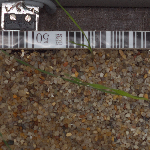

In [18]:
#Load an image using Keras image class
#image_file = os.path.join(BASE_PATH, 'plant_seedlings/train/Black-grass/a0405de4d.png')
image_file = os.path.join('', 'plant_seedlings/train/Black-grass/a0405de4d.png')
plant_seed_image = tf.keras.preprocessing.image.load_img(image_file, target_size=(150,150))
plant_seed_image

#Parameters

In [0]:
#Define some parameters
img_size = 70
img_depth = 3
batch_size = 64

#Create an ImageDataGenerator object, it can also split data between train and test.

In [0]:
#ImageDataGenerator declaration with 20% data as test (80% for training)
img_generator= tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20, 
                                                               width_shift_range=0.2, 
                                                               height_shift_range=0.2, 
                                                               horizontal_flip=True, 
                                                               vertical_flip=False, 
                                                               validation_split=0.2)

In [48]:
#Build training generator. 
train_generator = img_generator.flow_from_directory('plant_seedlings/train', #os.path.join(BASE_PATH,'plant_seedlings/train')
                                                    target_size=(img_size, img_size),
                                                    subset='training',
                                                    batch_size=batch_size)

Found 3803 images belonging to 12 classes.


In [49]:
#Build test generator. 
test_generator = img_generator.flow_from_directory('plant_seedlings/train', #os.path.join(BASE_PATH,'plant_seedlings/train')
                                                    target_size=(img_size, img_size),
                                                    subset='validation',
                                                    batch_size=batch_size)

Found 947 images belonging to 12 classes.


#ImageDataGenerator returns 64 images and their labels

In [50]:
#Check the features (images) and Labels (flower class) returned by ImageDataGenerator
X, y = next(train_generator)

print('Input features shape', X.shape)
print('Actual labels shape', y.shape)

Input features shape (64, 70, 70, 3)
Actual labels shape (64, 12)


In [75]:
X[0], y[0]

(array([[[218.64972 , 217.65608 , 218.65608 ],
         [206.00055 , 209.33379 , 211.00027 ],
         [206.31718 , 208.98882 , 212.653   ],
         ...,
         [191.      , 192.      , 198.      ],
         [191.      , 192.      , 198.      ],
         [191.      , 192.      , 198.      ]],
 
        [[217.88242 , 217.17651 , 218.17651 ],
         [205.71281 , 209.09401 , 210.8564  ],
         [206.94061 , 209.42043 , 213.18053 ],
         ...,
         [191.      , 192.      , 198.      ],
         [191.      , 192.      , 198.      ],
         [191.      , 192.      , 198.      ]],
 
        [[217.11511 , 216.69695 , 217.69695 ],
         [205.42506 , 208.85423 , 210.71254 ],
         [207.56406 , 209.85204 , 213.70805 ],
         ...,
         [191.      , 192.      , 198.      ],
         [191.      , 192.      , 198.      ],
         [191.      , 192.      , 198.      ]],
 
        ...,
 
        [[ 96.70429 ,  75.46233 ,  54.248802],
         [ 90.495766,  68.893105,  46.639

In [0]:
X_test, y_test = next(test_generator)

In [53]:
X_test.shape, y_test.shape

((64, 70, 70, 3), (64, 12))

### Visualize random images in Training and Test sets

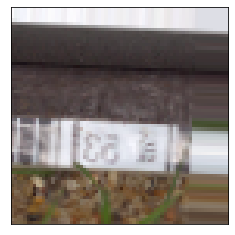

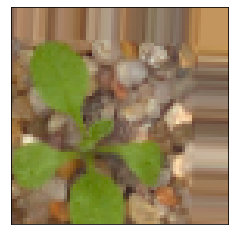

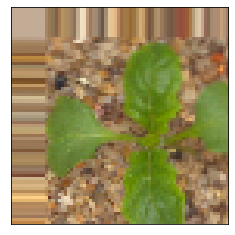

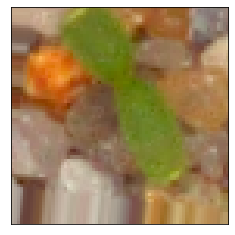

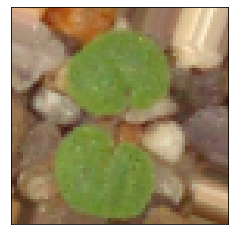

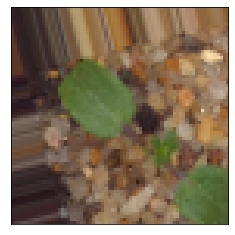

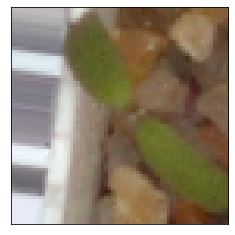

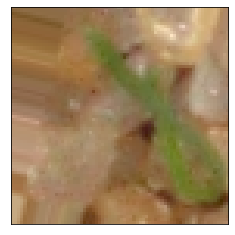

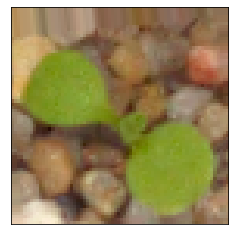

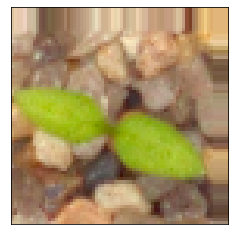

In [199]:
for i in range(10):
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(tf.keras.preprocessing.image.array_to_img(X[i]))
  plt.show()

#Build CNN Model

In [0]:
#Clear any previous model from memory
tf.keras.backend.clear_session()

#Initialize model
model = tf.keras.models.Sequential()

#normalize data
model.add(tf.keras.layers.BatchNormalization(input_shape=(img_size,img_size,3,)))

#Add Conv Layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

#normalize data
model.add(tf.keras.layers.BatchNormalization(input_shape=(img_size,img_size,3,)))

#Add Conv Layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

#normalize data
model.add(tf.keras.layers.BatchNormalization(input_shape=(img_size,img_size,3,)))

#Add Max Pool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Add Dense Layers after flattening the data
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))

#Add Dropout
model.add(tf.keras.layers.Dropout(0.25))

#Add Output Layer
model.add(tf.keras.layers.Dense(12, activation='softmax'))

In [0]:
#Specify Loss and Optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 70, 70, 3)         12        
_________________________________________________________________
conv2d (Conv2D)              (None, 68, 68, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 68, 68, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 66, 66, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 66, 66, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 33, 33, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 69696)             0

# Training the Model

In [0]:
#Saving the best model using model checkpoint callback
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('plant_seedings.h5', #os.path.join(BASE_PATH, 'plant_seedings.h5')
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose=1)

In [59]:
history_model= model.fit_generator(train_generator, 
                          epochs=100,
                          steps_per_epoch= 3803//batch_size,  #Number of training images//batch_size
                          validation_data=test_generator,
                          validation_steps = 947//batch_size, #Number of test images//batch_size
                          callbacks = [model_checkpoint]) 

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
59/59 [==============================] - ETA: 0s - loss: 4.3104 - accuracy: 0.1819
Epoch 00001: val_accuracy improved from -inf to 0.11438, saving model to plant_seedings.h5
59/59 [==============================] - 54s 908ms/step - loss: 4.3104 - accuracy: 0.1819 - val_loss: 2.8525 - val_accuracy: 0.1144
Epoch 2/100
59/59 [==============================] - ETA: 0s - loss: 2.3356 - accuracy: 0.2100
Epoch 00002: val_accuracy did not improve from 0.11438
59/59 [==============================] - 52s 883ms/step - loss: 2.3356 - accuracy: 0.2100 - val_loss: 40.2141 - val_accuracy: 0.0668
Epoch 3/100
59/59 [==============================] - ETA: 0s - loss: 2.2201 - accuracy: 0.2551
Epoch 00003: val_accuracy did not improve from 0.11438
59/59 [==============================] - 53s 898ms/step - loss: 2.2201 - accuracy: 0.2551 - val_loss: 65.2228 - val_accuracy: 0.0713
Epoch 4/100
59/59 [=====================

In [60]:
history_model= model.fit_generator(train_generator, 
                        epochs=150,
                        initial_epoch=100, 
                          steps_per_epoch= 3803//batch_size,  #Number of training images//batch_size
                          validation_data=test_generator,
                          validation_steps = 947//batch_size, #Number of test images//batch_size
                          callbacks = [model_checkpoint])

Epoch 101/150
59/59 [==============================] - ETA: 0s - loss: 0.5211 - accuracy: 0.8171
Epoch 00101: val_accuracy did not improve from 0.86523
59/59 [==============================] - 50s 852ms/step - loss: 0.5211 - accuracy: 0.8171 - val_loss: 0.8207 - val_accuracy: 0.8256
Epoch 102/150
59/59 [==============================] - ETA: 0s - loss: 0.4859 - accuracy: 0.8371
Epoch 00102: val_accuracy did not improve from 0.86523
59/59 [==============================] - 51s 863ms/step - loss: 0.4859 - accuracy: 0.8371 - val_loss: 0.5940 - val_accuracy: 0.8607
Epoch 103/150
59/59 [==============================] - ETA: 0s - loss: 0.4851 - accuracy: 0.8224
Epoch 00103: val_accuracy improved from 0.86523 to 0.86863, saving model to plant_seedings.h5
59/59 [==============================] - 51s 864ms/step - loss: 0.4851 - accuracy: 0.8224 - val_loss: 0.5656 - val_accuracy: 0.8686
Epoch 104/150
59/59 [==============================] - ETA: 0s - loss: 0.4990 - accuracy: 0.8254
Epoch 00104:

#### Save the model

In [0]:
#Save the model
model.save_weights('plant_classification_model_wieghts.h5')
model.save('plant_classification_model_keras.h5')

### Evaluate the model on Training and Test datasets

In [61]:
#Evaluate the model's loss and accuracy on Training-set

score_train = model.evaluate(X, y, verbose=0)
print("The loss using train data is: ",round(score_train[0],3))
print("The accuracy of train data is: ",round(score_train[1],3))

The loss using train data is:  0.341
The accuracy of train data is:  0.891


In [62]:
#Evaluate the model's loss and accuracy on Test-set

score_test = model.evaluate(X_test, y_test, verbose=0)
print("The loss using test data is: ",round(score_test[0],3))
print("The accuracy of test data is: ",round(score_test[1],3))

The loss using test data is:  0.443
The accuracy of test data is:  0.906


### Model Performance : Plot loss and accuracy over no of epochs

In [0]:
def plot_metrics(ax, fontsize, col1, col2, x_label, y_label, title):
    ax.plot((history_model.history[col1]))
    ax.plot((history_model.history[col2]))
    #ax.locator_params(nbins=3)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend(['Training-data', 'Test-data'])
    ax.set_title(title)

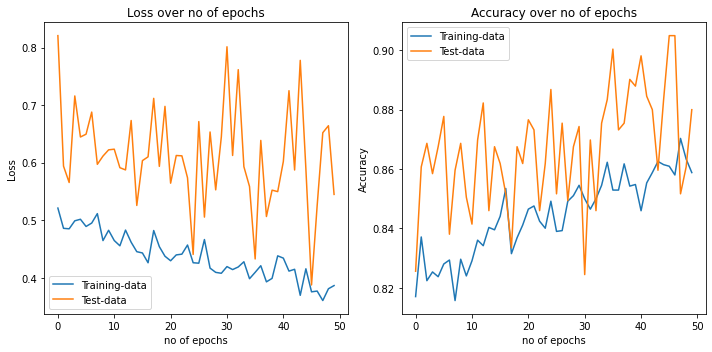

In [64]:
plt.close('all')
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
plot_metrics(ax1, 30, 'loss', 'val_loss', 'no of epochs', 'Loss', 'Loss over no of epochs')
plot_metrics(ax2, 30, 'accuracy', 'val_accuracy', 'no of epochs', 'Accuracy', 'Accuracy over no of epochs')
plt.tight_layout()
plt.show()

#### Observations:
- For the last 50 epochs, the training loss is decreasing with less variance, but the test loss is varying with much variance over batches.

### Predict the classes using above model on Test dataset

In [0]:
#Predict the Probabilities and Classes on Test-set
y_predict_test = model.predict(X_test)
y_predict_test_classes = model.predict_classes(X_test)

In [70]:
#Predicted Probabilities on Test-set
#pick any few indices
y_predict_test[0]

array([1.1257671e-11, 4.5336104e-09, 2.4258007e-10, 5.0664233e-09,
       2.5576503e-13, 4.5791106e-07, 2.7974900e-10, 1.9093743e-07,
       8.0351781e-11, 1.2527059e-07, 9.9999917e-01, 3.7181009e-14],
      dtype=float32)

In [77]:
np.argmax(model.predict(X_test), axis=-1)[0:6]

array([10,  4,  6,  1,  3, 10])

In [73]:
#Predicted Classes for Test-set
y_predict_test_classes[0:6]

array([10,  4,  6,  1,  3, 10])

In [78]:
#Actual Classes for Test-set
np.argmax(y_test[0:6], axis=1)

array([10,  2,  6,  1,  3, 10])

### Print the classification accuracy metrics, 
### Confusion Matrix and Classification Report using the built model for Test dataset

In [80]:
#accuracy score on Test dataset
accuracy_score(np.argmax(y_test, axis=1), y_predict_test_classes)

0.90625

In [82]:
#precision score on Test dataset
precision_score(np.argmax(y_test, axis=1), y_predict_test_classes, average='weighted', zero_division=1)

0.9216213474025974

In [84]:
#recall score on Test dataset
recall_score(np.argmax(y_test, axis=1), y_predict_test_classes, average='weighted')

0.90625

In [85]:
#f1 score on Test dataset
f1_score(np.argmax(y_test, axis=1), y_predict_test_classes, average='weighted')

0.8928628663003663

In [86]:
#Confusion Matrix for Test dataset
confusion_matrix(np.argmax(y_test, axis=1), y_predict_test_classes)

array([[ 1,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  7,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  7]])

In [88]:
#Classification Report for Test dataset
print(classification_report(np.argmax(y_test, axis=1), y_predict_test_classes, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.86      1.00      0.92         6
           2       1.00      0.00      0.00         1
           3       1.00      0.88      0.93         8
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         7
           6       0.75      1.00      0.86         6
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         8
           9       0.50      0.50      0.50         2
          10       0.91      1.00      0.95        10
          11       1.00      1.00      1.00         7

    accuracy                           0.91        64
   macro avg       0.90      0.78      0.78        64
weighted avg       0.92      0.91      0.89        64



### Predict the classes using above model on Validation datset

In [101]:
!ls -l

total 245232
-rw-r--r-- 1 root root 107612200 Apr 13 07:58 plant_classification_model_keras.h5
-rw-r--r-- 1 root root  35878888 Apr 13 07:58 plant_classification_model_wieghts.h5
-rw-r--r-- 1 root root 107612200 Apr 13 07:27 plant_seedings.h5
drwxr-xr-x 4 root root      4096 Apr 13 04:46 plant_seedlings
drwxr-xr-x 1 root root      4096 Apr  3 16:24 sample_data


In [0]:
path = 'plant_seedlings/test/*.png'
files = glob.glob(path)

testImg = []
testId = []
j = 1
num = len(files)
transform_fn = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20, 
                                                               width_shift_range=0.2, 
                                                               height_shift_range=0.2, 
                                                               horizontal_flip=True, 
                                                               vertical_flip=False, 
                                                               validation_split=0.2)

# Obtain images and resizing, obtain labels
for img in files:
    #print("Obtain images: " + str(j) + "/" + str(num))#, end='\r')
    testId.append(img.split('/')[-1])  # Images id's
    transformed_img = tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img(img, target_size=(img_size, img_size)))
    testImg.append(transform_fn.random_transform(transformed_img))
    j+=1

In [147]:
print(len(testId),len(testImg))

794 794


In [148]:
testImg = np.asarray(testImg)
testImg.shape
#type(testImg)

(794, 70, 70, 3)

In [0]:
#print(testImg[0], testId[0])
#testImg.ravel().shape

In [0]:
#Predict the probability percentages and the classes which were predicted using above model for Validation-set
y_predict_val = model.predict(testImg)

In [184]:
predicted_classes = np.argmax(y_predict_val, axis=1)
predicted_classes

array([ 1,  6,  5,  3,  2,  1,  6,  3,  1,  2,  0,  6, 11,  3,  6, 11,  6,
        1,  8,  3, 11,  0,  5,  8,  9, 10,  3,  3, 11,  1,  1, 10,  6,  1,
       10, 11,  5,  6,  3,  6,  6,  6,  5,  6,  2,  5,  2,  3,  3,  2,  6,
        1, 11,  6,  6, 11,  8,  9,  5,  4,  4,  1,  2,  4,  3,  9,  8,  6,
       10,  5,  6,  2,  4, 10,  8,  8,  9,  1,  2,  7,  4,  1,  0,  8,  4,
        1, 11, 10,  6,  0,  0,  5,  8,  9,  5,  6,  2,  3,  6, 11,  2,  5,
       10,  1,  6,  2,  2,  9,  2,  1,  5,  3,  5,  6,  2,  1,  0,  6,  6,
        8, 10,  1,  3,  2,  6,  1,  3,  3,  3,  3,  3,  3,  8,  1,  1,  6,
        3,  0,  8,  6, 10,  1,  0, 10,  6,  0,  9,  8,  3,  7,  1, 10,  0,
        9,  1, 11, 10,  3,  3,  3,  7, 10,  9,  0,  8,  6, 10,  7, 10,  9,
       11,  7,  6,  0,  7, 10,  6,  3, 10,  8,  3,  7,  6,  6,  0,  6,  3,
        3,  6,  1,  6, 11, 10,  6,  5,  4,  3,  0,  9,  6, 11, 10,  3,  3,
        6, 10,  2,  8,  8,  8,  3,  1,  2,  3,  3,  6,  0,  1,  6,  2,  8,
        9,  0,  6,  8,  6

In [0]:
species = []
for i in predicted_classes:
  if i in (list(train_generator.class_indices.values())):
    #print(list(train_generator.class_indices.items())[i][1], list(train_generator.class_indices.items())[i][0])
    species.append(list(train_generator.class_indices.items())[i][0])
  else:
    print('Not present..!!!')

In [0]:
submission = pd.DataFrame(data={'file': testId, 'species': species})

In [196]:
submission.shape

(794, 2)

In [197]:
submission.head()

,file,species
0,69d1669f8.png,Charlock
1,cf3a8b2fd.png,Loose Silky-bent
2,429211ee6.png,Fat Hen
3,7e9cf1c46.png,Common Chickweed
4,d689256be.png,Cleavers


In [0]:
submission.to_csv('plant_seedlings.csv', index=False)

# Kaggle Score : 0.86901
### Competition is complete. The rank would be 615

### Inference:
- The accuracy score on train dataset is 89.1% 
- The accuracy score on test dataset  is 90.6%
- The mean Precision score on validation dataset which was submitted to kaggle is 89.601 %
- The model is performing well on both test and validation datasets without any overfiit or under fit